In [1]:
# System
import os

# Data preparation
import pandas as pd
import numpy as np

# Plotting
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns

%matplotlib inline
# figure size in inches optional
rcParams['figure.figsize'] = 8, 8

In [2]:
# Get filepaths of all LFW embeddings
all_files_list = []
for subdir, dirs, files in os.walk(os.path.join("../data/features_cleaner/")):
    for element in files:
        file = os.path.join(subdir, element)
        all_files_list.append(file)

In [43]:
embedding = np.load("../data/features_cleaner/Aaron_Eckhart_0001.npy")
embedding = np.pad(embedding, (8, 9), 'constant', constant_values=(0,0))   
embedding = embedding.reshape(23,23)

embedding_pemiu = np.load("../data/features_cleaner_pemiu16/Aaron_Eckhart_0001.npy")
embedding_pemiu = np.pad(embedding_pemiu, (8, 9), 'constant', constant_values=(0,0))   
embedding_pemiu = embedding_pemiu.reshape(23,23)


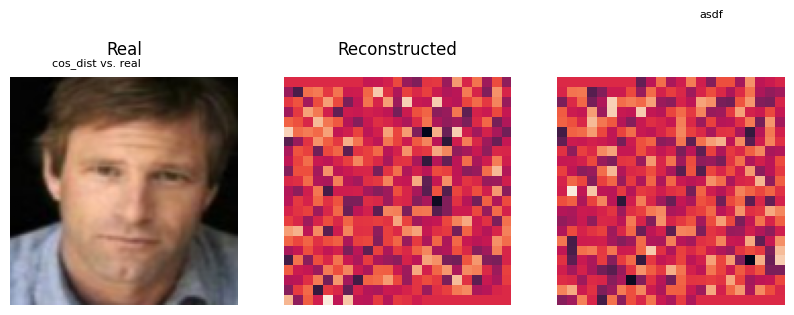

In [44]:
def get_images(filename):
    return [f"../recreate_icip2022_face_reconstruction/sample_images/{filename}_original.png"]

def display_image(filename):
    # read images
    img = []
    img.append(mpimg.imread(get_images(filename)[0]))

    # display images
    fig, ax = plt.subplots(1,3, figsize=(10,10))
    
    ax[0].set_title("Real", pad=16)
    ax[1].set_title("Reconstructed", pad=16)
    
    # Display cosine similarity score
    ax[0].text(20, -6, "cos_dist vs. real", fontsize=8)
    ax[1].text(42, -6, "asdf", fontsize=8)
     
    ax[0].axis('off')
    ax[1].axis('off')
    ax[2].axis('off')
    ax[0].imshow(img[0])
    # ax[1].imshow(img[0])
    sns.heatmap(embedding, ax=ax[1], square=True, cbar=False)
    sns.heatmap(embedding_pemiu, ax=ax[2], square=True, cbar=False)
        
display_image("Aaron_Eckhart_0001")

In [3]:
# -----------------------------------------
# Path settings

# Graphics savepath
plt_savepath = "./final_eval_arcface_plt/"
os.makedirs(plt_savepath, exist_ok=True)

# Evaluation folder
evaluation_path = "../evaluation/elasticface/"

# Experiment 7 folder (contains evaluation results with ArcFace)
experiment_7_path = "../recreate_icip2022_face_reconstruction/experiments/experiment_7_model1_pemiu_block_sizes/"

# Model training training_files (model trained with ArcFace)
training_files_path = "../recreate_icip2022_face_reconstruction/training_files/"
# -----------------------------------------

# Global variables
block_sizes = ["16", "32", "64", "128"]

In [6]:
# Pyeer report unprotected for system evaluation
df_pyeer_unprotected = pd.read_csv(f"../evaluation/pyeer_lfwview2_unprotected_elasticface_biometric_performance/eer_report.csv", 
                       sep=",", skiprows=[0])
df_pyeer_unprotected.drop(df_pyeer_unprotected.index[1:], inplace=True)

# Mated / non-mated comparisons (LFW view2), normalized cos_sim calculations
df_genuine = pd.read_csv(f"{evaluation_path}lfwview2_genuine_cos_sim.csv", sep=",")
df_impostor = pd.read_csv(f"{evaluation_path}lfwview2_impostor_cos_sim.csv", sep=",")

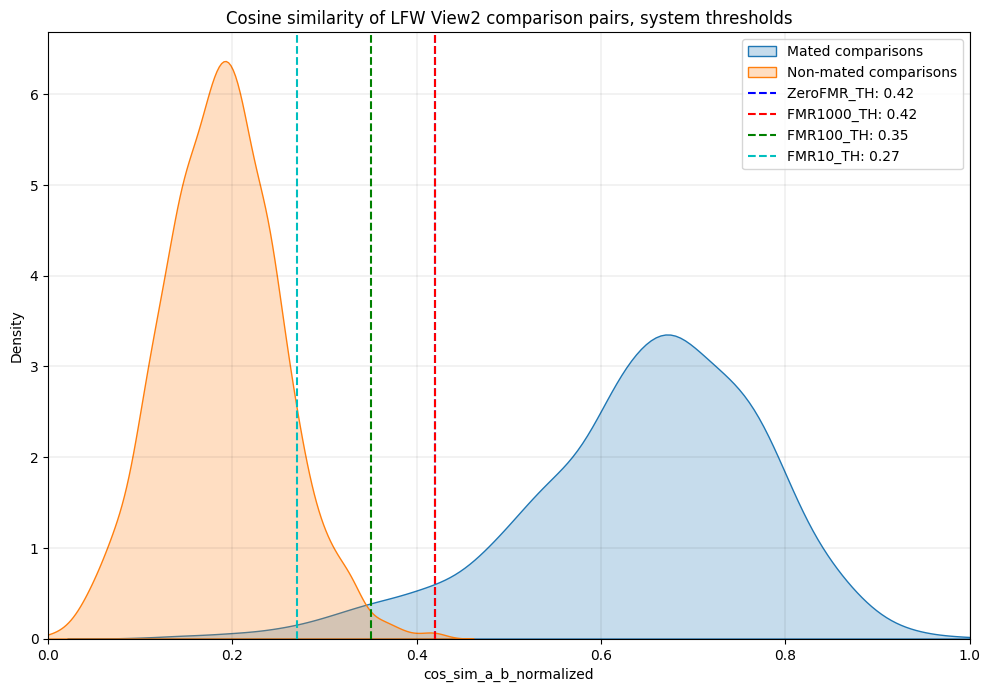

In [7]:
fig, ax = plt.subplots(1, 1,
                        figsize = (10, 7),
                        tight_layout = True)

# Settings
labels_th = ['ZeroFMR_TH', 'FMR1000_TH', 'FMR100_TH', 'FMR10_TH']
colors = ["b", "r", "g", "c"]

# Title
ax.set_title("Cosine similarity of LFW View2 comparison pairs, system thresholds")

# Comparison: Genuine and impostor
sns.kdeplot(df_genuine['cos_sim_a_b_normalized'], label="Mated comparisons", fill=True)
sns.kdeplot(df_impostor['cos_sim_a_b_normalized'], label="Non-mated comparisons", fill=True)

ax.legend()
plt.xlim([0, 1])

# Thresholds
for index, row in enumerate(df_pyeer_unprotected[['ZeroFMR_TH', 'FMR1000_TH', 'FMR100_TH', 'FMR10_TH']]):
    ax.axvline(x = round(((df_pyeer_unprotected[row].values[0])), 2), 
               color = colors[index], linestyle="--",
               label = f'{labels_th[index]}: {round(df_pyeer_unprotected[row].values[0], 2)}')
ax.legend()

ax.grid(visible=True, which='major', color='black', linewidth=0.075)
# Show plot
plt.savefig(f'{plt_savepath}01_01_system_threshold.svg', bbox_inches='tight')
plt.show()

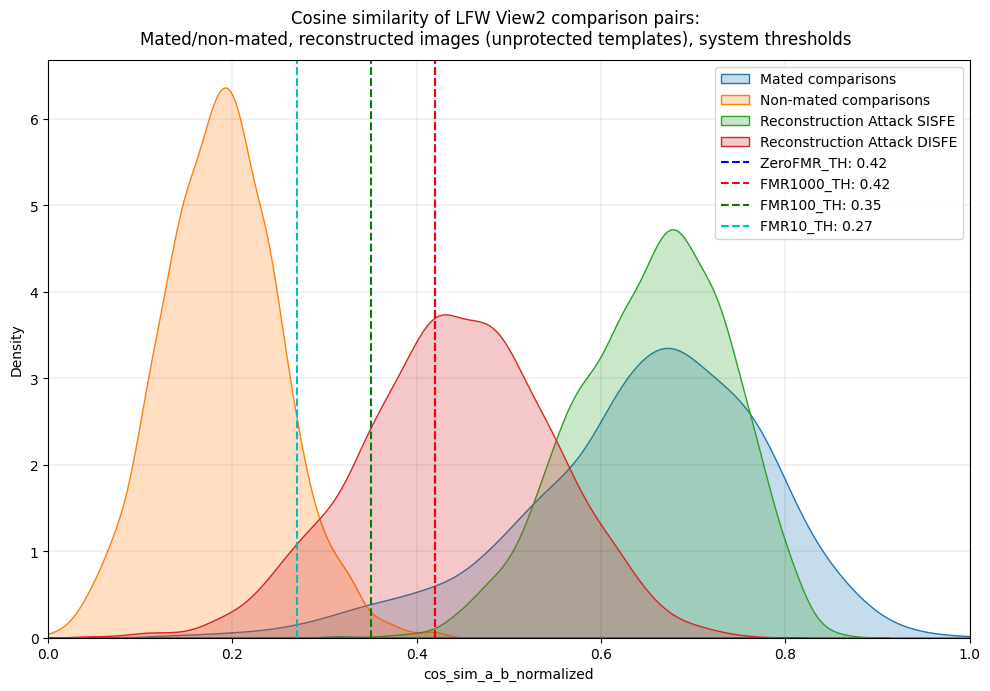

In [8]:
fig, ax = plt.subplots(1, 1,
                        figsize = (10, 7),
                        tight_layout = True)

# Title
fig.suptitle("Cosine similarity of LFW View2 comparison pairs:\n" \
             "Mated/non-mated, reconstructed images (unprotected templates), system thresholds")

# Settings
labels_th = ['ZeroFMR_TH', 'FMR1000_TH', 'FMR100_TH', 'FMR10_TH']
colors = ["b", "r", "g", "c"]

sns.kdeplot(df_genuine['cos_sim_a_b_normalized'], ax=ax, label="Mated comparisons", fill=True)
sns.kdeplot(df_impostor['cos_sim_a_b_normalized'], label="Non-mated comparisons", fill=True)
sns.kdeplot(df_genuine['cos_sim_a_a_reconstructed_normalized'], label="Reconstruction Attack SISFE", fill=True)
sns.kdeplot(df_genuine['cos_sim_a_b_reconstructed_normalized'], label="Reconstruction Attack DISFE", fill=True)

ax.legend()
plt.xlim([0, 1])

# Thresholds
for index, row in enumerate(df_pyeer_unprotected[['ZeroFMR_TH', 'FMR1000_TH', 'FMR100_TH', 'FMR10_TH']]):
    ax.axvline(x = round(((df_pyeer_unprotected[row].values[0])), 2), 
               color = colors[index], linestyle="--", 
               label = f'{labels_th[index]}: {round(df_pyeer_unprotected[row].values[0], 2)}')
ax.legend()
ax.grid(visible=True, which='major', color='black', linewidth=0.075)

# Show plot
plt.savefig(f'{plt_savepath}02_05_attack_performance.svg', bbox_inches='tight')
plt.show()